In [1]:
import os
import sys
import glob
import platform

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tqdm import tqdm_notebook

In [2]:
if 'Windows' in platform.platform() and '8.1' in platform.release():
    _ = "C:\\Users\\Andrey\\YandexDisk\\3.Programing\\"
    DATA_DIR = _ + "work\\PulseViewer\\pulsarsData\\"
    PATTERN_DIR = _ + "work\\PulseViewer\\frame_of_AP\\patterns\\"
    PACK_DIR = _ + "myPacks\\"
    DELIMITER = "\\"

elif 'Windows' in platform.platform() and '7' in platform.release():
    _ = "E:\\Disk.Yandex\\3.Programing\\"
    DATA_DIR = "work\\PulseViewer\\pulsarsData\\"
    PATTERN_DIR = _ + "work\\PulseViewer\\frame_of_AP\\patterns\\"
    PACK_DIR = _ + "myPacks\\"
    DELIMITER = "\\"

elif 'Windows' in platform.platform() and '10' in platform.release():
    _ = "F:\\YandexDisk\\3.Programing\\"
    DATA_DIR = _ + "work\\PulseViewer\\pulsarsData\\"
    PATTERN_DIR = _ + "work\\PulseViewer\\frame_of_AP\\patterns\\"
    PACK_DIR = _ + "myPacks\\"
    ALL_DATA = "F:\\YandexDisk\\1.Работа\\Результаты обработки\\"
    DELIMITER = "\\"

elif 'Linux' in platform.platform() and '4.4.0' in platform.release():
    _ = "/home/andr/Yandex.Disk/3.Programing/"
    DATA_DIR = _ + "work/PulseViewer/pulsarsData/"
    PATTERN_DIR = _ + "/work/PulseViewer/frame_of_AP/patterns/"
    PACK_DIR = _ + "myPacks/"
    ALL_DATA = "/home/andr/Yandex.Disk/1.Работа/Результаты обработки/"
    DELIMITER = "/"

else:
    print('unknown system', platform.platform(), platform.release())

TEST_PIC = _ + 'test_pic'
sys.path.append(PACK_DIR)
from PRAO import *

In [3]:
# gp_table = pd.read_table('crab_gp_kaz_10_2010-2018_calib.csv', sep='\t')
gp_table = pd.read_table('crab_gp_kaz_10_2010-2018_calib_sigma.csv', sep='\t')

In [4]:
gp_table.head()

,Date,Time start,"Tay, ms","Period, s","Numpointwin, point","Numpulse, a.u.","Median, adc u","STD, adc u",path obs plot,path obs data,"Count of GP, u","point of gp, point","amp of gp, adc u","amp of gp, snr","W50, point","W10, point",path plot,fName
0,13.02.2010,20:26:28.9413394,2.4576,5.988346,2430,34,1719.973935,7.172373,./obs_plot/13.02.2010_plot_0531+21.png,.\obs_data\13.02.2010_obs_0531+21.csv,1,51612,45.817525,6.388056,17.82990,60.28605,./gp_plot/13.02.2010_plot_0531+21_0.png,./gp_plot_txt/13.02.2010_plot_0531+21_0.csv
1,04.09.2010,07:08:21.3085403,2.4576,5.988555,2430,34,1719.899290,7.332353,./obs_plot/04.09.2010_plot_0531+21.png,.\obs_data\04.09.2010_obs_0531+21.csv,1,67994,41.604220,5.674061,48.41100,55.88550,./gp_plot/04.09.2010_plot_0531+21_0.png,./gp_plot_txt/04.09.2010_plot_0531+21_0.csv
2,04.09.2010,07:08:21.3085403,2.4576,5.988555,2430,34,1719.899290,7.332353,./obs_plot/04.09.2010_plot_0531+21.png,.\obs_data\04.09.2010_obs_0531+21.csv,1,77716,38.214550,5.211772,45.40635,54.73215,./gp_plot/04.09.2010_plot_0531+21_1.png,./gp_plot_txt/04.09.2010_plot_0531+21_1.csv
3,04.09.2010,07:08:21.3085403,2.4576,5.988555,2430,34,1719.899290,7.332353,./obs_plot/04.09.2010_plot_0531+21.png,.\obs_data\04.09.2010_obs_0531+21.csv,1,80184,36.960590,5.040754,5.73750,15.00000,./gp_plot/04.09.2010_plot_0531+21_2.png,./gp_plot_txt/04.09.2010_plot_0531+21_2.csv
4,04.09.2010,07:08:21.3085403,2.4576,5.988555,2430,34,1719.899290,7.332353,./obs_plot/04.09.2010_plot_0531+21.png,.\obs_data\04.09.2010_obs_0531+21.csv,1,72868,36.738000,5.010397,6.30135,41.52060,./gp_plot/04.09.2010_plot_0531+21_3.png,./gp_plot_txt/04.09.2010_plot_0531+21_3.csv


In [5]:
gp_table["Type"] = ""

In [6]:
f_to_pulse = sorted(glob.glob('./to_pulse/*.png'))
f_to_pulse = [os.path.basename(i) for i in f_to_pulse]
print(len(f_to_pulse))

3653


In [7]:
for idx, row in gp_table.iterrows():
    if os.path.basename(row['path plot']) in f_to_pulse:
        gp_table["Type"][idx] = "Pulse"
    else:
        gp_table["Type"][idx] = "Noise"

c:\users\professional\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
c:\users\professional\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [8]:
gp_table

,Date,Time start,"Tay, ms","Period, s","Numpointwin, point","Numpulse, a.u.","Median, adc u","STD, adc u",path obs plot,path obs data,"Count of GP, u","point of gp, point","amp of gp, adc u","amp of gp, snr","W50, point","W10, point",path plot,fName,Type
0,13.02.2010,20:26:28.9413394,2.4576,5.988346,2430,34,1719.973935,7.172373,./obs_plot/13.02.2010_plot_0531+21.png,.\obs_data\13.02.2010_obs_0531+21.csv,1,51612,45.817525,6.388056,17.82990,60.28605,./gp_plot/13.02.2010_plot_0531+21_0.png,./gp_plot_txt/13.02.2010_plot_0531+21_0.csv,Noise
1,04.09.2010,07:08:21.3085403,2.4576,5.988555,2430,34,1719.899290,7.332353,./obs_plot/04.09.2010_plot_0531+21.png,.\obs_data\04.09.2010_obs_0531+21.csv,1,67994,41.604220,5.674061,48.41100,55.88550,./gp_plot/04.09.2010_plot_0531+21_0.png,./gp_plot_txt/04.09.2010_plot_0531+21_0.csv,Noise
2,04.09.2010,07:08:21.3085403,2.4576,5.988555,2430,34,1719.899290,7.332353,./obs_plot/04.09.2010_plot_0531+21.png,.\obs_data\04.09.2010_obs_0531+21.csv,1,77716,38.214550,5.211772,45.40635,54.73215,./gp_plot/04.09.2010_plot_0531+21_1.png,./gp_plot_txt/04.09.2010_plot_0531+21_1.csv,Noise
3,04.09.2010,07:08:21.3085403,2.4576,5.988555,2430,34,1719.899290,7.332353,./obs_plot/04.09.2010_plot_0531+21.png,.\obs_data\04.09.2010_obs_0531+21.csv,1,80184,36.960590,5.040754,5.73750,15.00000,./gp_plot/04.09.2010_plot_0531+21_2.png,./gp_plot_txt/04.09.2010_plot_0531+21_2.csv,Noise
4,04.09.2010,07:08:21.3085403,2.4576,5.988555,2430,34,1719.899290,7.332353,./obs_plot/04.09.2010_plot_0531+21.png,.\obs_data\04.09.2010_obs_0531+21.csv,1,72868,36.738000,5.010397,6.30135,41.52060,./gp_plot/04.09.2010_plot_0531+21_3.png,./gp_plot_txt/04.09.2010_plot_0531+21_3.csv,Noise
5,05.09.2010,07:04:25.4187240,2.4576,5.988559,2430,34,1719.846590,7.883726,./obs_plot/05.09.2010_plot_0531+21.png,.\obs_data\05.09.2010_obs_0531+21.csv,1,21354,78.662550,9.977839,18.24570,54.21735,./gp_plot/05.09.2010_plot_0531+21_0.png,./gp_plot_txt/05.09.2010_plot_0531+21_0.csv,Pulse
6,05.09.2010,07:04:25.4187240,2.4576,5.988559,2430,34,1719.846590,7.883726,./obs_plot/05.09.2010_plot_0531+21.png,.\obs_data\05.09.2010_obs_0531+21.csv,1,3063,43.940990,5.573632,10.59300,88.14960,./gp_plot/05.09.2010_plot_0531+21_1.png,./gp_plot_txt/05.09.2010_plot_0531+21_1.csv,Noise
7,06.09.2010,07:00:29.5241603,2.4576,5.988564,2430,34,1719.808575,7.790818,./obs_plot/06.09.2010_plot_0531+21.png,.\obs_data\06.09.2010_obs_0531+21.csv,1,11329,57.915495,7.433814,22.94820,49.92075,./gp_plot/06.09.2010_plot_0531+21_0.png,./gp_plot_txt/06.09.2010_plot_0531+21_0.csv,Noise
8,06.09.2010,07:00:29.5241603,2.4576,5.988564,2430,34,1719.808575,7.790818,./obs_plot/06.09.2010_plot_0531+21.png,.\obs_data\06.09.2010_obs_0531+21.csv,1,77676,44.724755,5.740700,51.09390,94.01535,./gp_plot/06.09.2010_plot_0531+21_1.png,./gp_plot_txt/06.09.2010_plot_0531+21_1.csv,Noise
9,06.09.2010,07:00:29.5241603,2.4576,5.988564,2430,34,1719.808575,7.790818,./obs_plot/06.09.2010_plot_0531+21.png,.\obs_data\06.09.2010_obs_0531+21.csv,1,36729,42.729465,5.484593,15.46380,31.68990,./gp_plot/06.09.2010_plot_0531+21_2.png,./gp_plot_txt/06.09.2010_plot_0531+21_2.csv,Pulse


In [9]:
gp_table.to_csv('crab_gp_kaz_10_2016-2018_calib_sigma_typed.csv',  sep='\t', header=True, index=False)

In [19]:
gp_table = pd.read_table('crab_gp_kaz_10_2016-2018_calib_typed.csv', sep='\t')

In [21]:
gp_table['Type'][131]

'Pulse'

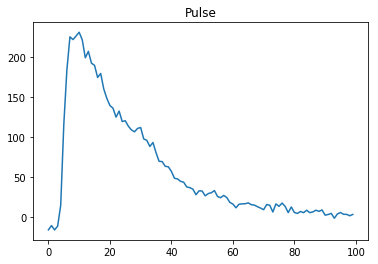

In [6]:
for indx, row in tqdm_notebook(gp_table.iterrows()):
    pulse = np.loadtxt(row['fName'], skiprows=4)
    plt.close()
    plt.title(row['Type'])
    plt.plot(pulse)

    if row['Type'] == 'Pulse':
        plt.savefig('./pulses/' + row['Date'] + '_plot_' + str(indx) + '.png',
                    format='png')
    elif row['Type'] == 'Noise':
        plt.savefig('./trash/' + row['Date'] + '_plot_' + str(indx) + '.png',
                    format='png')
    else:
        print('Alert! Something wrong!!!')